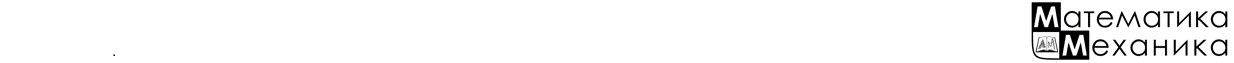

<div style="height:30px"></div>
<h1 align="center">ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ УНИВЕРСИТЕТ</h1>
<h3 align="center">Институт математики, механики и компьютерных наук имени И. И. Воровича</h3>
<div style="height:240px"></div>
<h1 align="center">ИНДИВИДУАЛЬНАЯ РАБОТА № 2<br/> «Вычисления с использованием пакета Numpy»<br/>
по курсу «Технология программирования и практикум на ЭВМ»</h1>
<h3 align="center">По курсу «Технология программирования и практикум на ЭВМ»</h3>
<div style="height:350px"></div>

<p style="text-align:right">
ВЫПОЛНИЛИ: студенты 7 группы 1 курса<br/>
</p>

<ul style="list-style-type: none; text-align:right; padding-bottom:20px">
  <li>Григорян Владислав Артурович</li>
  <li>Докторов Илья Витальевич</li>
  <li>Максименко Виталий Максимович</li>
  <li>Умишов Абу-Висхан Абухусейнович</li>
</ul> 

<p style="text-align:right">
ПРОВЕРИЛ: доцент кафедры теории<br/>
упругости ИММ и КН<br/>
Карякин Михаил Игоревич<br/>
</p>

<div style="margin-top:200px"></div>
<h5 align="center">Ростов-на-Дону, 2022</h5>

## Вариант 9. Самый частый элемент

Дан массив целых положительных чисел, не превосходящих $M=1000$. Определить, какое из чисел 
встречается в массиве чаще всего
Способы решения:
<b>
1. «лобовое» решение на чистом Питоне: определить, сколько раз встречается каждый элемент, из полученных значений выбрать наибольшее
2. с использованием словаря
3. с использованием вспомогательного массива размера M, который инициализируется нулевыми значениями (идея аналогична словарю, только нерациональна в смысле памяти)
4. с использованием функции bincount пакета numpy (нерационально в смысле памяти, но должно быть быстро)
</b>

## Описание способов выполнения задания
<hr>

### Определение общих переменных и импорт зависимостей

In [3]:
%matplotlib inline
from random import randint
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# У чисел, среди которых мы будем искать наибольшее
# есть ограничение : это натуральные числа не больше
# M = 1000
M = 1000

# Массивы, используемые при проверки корректности алгоритмов
diverse_test_lst = np.arange(1, 1001)
solid_test_lst = [1] * 600 + [2] * 400
random_test_lst = np.array([randint(1, M + 1) for _ in range(10000)])

initial_array_size = 1000
final_array_size = 10000
step_size = 25
array_sizes = list(range(initial_array_size, final_array_size + 1, step_size))
# Можно, конечно, сразу сгенерировать массивы из случайных элементов для каждого размера,
# но для большей случайности, генерируем их отдельно для каждого из четырех способов

### Первый способ решения

In [ ]:
def first_approach_function(lst):
    sorted_lst = sorted(lst)
    counter = 0
    max_counter = 0
    prev_elem = lst[0]
    for elem in sorted_lst[1:]:
        if elem != prev_elem:
            if counter > max_counter:
                max_counter = counter
                most_frequent_elem = prev_elem
            counter = 0
        counter += 1
        prev_elem = elem
    return most_frequent_elem

### Второй способ решения

In [ ]:
def second_approach_function(lst):
    frequency_dict = {}
    for elem in lst:
        corresponding_counter = frequency_dict.get(elem)
        if corresponding_counter is None:
            frequency_dict[elem] = 1
        else:
            frequency_dict[elem] += 1
    return max(frequency_dict, key=lambda key : frequency_dict[key])

In [ ]:
def second_approach_function_help(lst):
    frequency_dict = {}
    for elem in lst:
        corresponding_counter = frequency_dict.get(elem)
        if corresponding_counter is None:
            frequency_dict[elem] = 1
        else:
            frequency_dict[elem] += 1
    return list(frequency_dict.values())

### Третий способ решения

In [ ]:
def third_approach_function(lst):
    """
    То же самое, что и через словарь, но
    вместо ключей используются индексы в массиве,
    т.е. элемент 49 - значит прибавляем единицу к
    сорок девятой ячейке, которая была до этого нулем
    (вспомогательный массив инициализируется нулевым)
    """
    auxillary_length = max(lst)
    counter_lst = [0] * auxillary_length
    for i in lst:
        counter_lst[i - 1] += 1
    most_frequent_el = max(counter_lst)
    return counter_lst.index(most_frequent_el) + 1

### Четвертый способ решения
Последний вариант решения основан на встроенной в numpy функции bincount.

In [ ]:
def fourth_approach_function(lst):
    np_lst = np.array(lst)
    frequency_lst = np.bincount(np_lst)
    return (np.where(frequency_lst == max(frequency_lst))[0][0])

## Тестирование
<hr>

#### Проверка корректности первого способа

#### Проверка корректности второго способа

#### Проверка корректности третьего способа

#### Проверка корректности четвертого способа

Сначала подтвердим корректность на очевидных наборах данных, первый из которых однороден, состоит из одних лишь единиц, а во втором единиц больше, чем двоек.

In [ ]:
print(f"{fourth_approach_function(diverse_test_lst)}")
print(f"{fourth_approach_function(solid_test_lst)}")

Теперь оценим корректность работы алгоритма на массиве из случайных чисел. Поскольку такую оценку сложно выполнить умозрительно, совершим её, опираясь на график распределения чисел.

In [ ]:
# Найдем частоту вхождения каждого элемента в
# этот массив, используя встроенную функцию, в корректности работы
# которой мы уверены
# У нас в массиве только натуральные числа и есть max значение - то что нужно bincount.
# bincount создает массив
# длиною max (получается, всем возможным элементам массива мы сопоставляем
# ячейку). Например, можем охарактеризовать частотность каждого элемента в
# массиве [1, 1, 3, 5, 3] через bincount следующим образом : 
# [2, 0, 2, 0, 1] - частота вхождения
# [1, 2, 3, 4, 5] - индекс, соответсвующий элементу массива
# т.е. для элемента величиной N его частота хранится в 
# ячейке массива с индексом N - 1
frequency_lst_4 = np.bincount(random_test_lst)
# При помощи написанной нами функции находим самый частый элемент
fourth_appoach_result = fourth_approach_function(random_test_lst)
# Задаем размер графика. Меньше его делать не стоит, поскольку
# могут не отрисоваться значения
plt.rcParams["figure.figsize"] = (20,3)
# Строим график. bar строит немного иначе, чем plot
plt.plot(list(range(len(frequency_lst_4))), frequency_lst_4)
# Ставим найденный нами самый частый элемент. Наша функция возвращает
# только его значение, но не частоту вхождения в массив, за ней 
# обращаемся к тому, что выдал нам прежде bincount
plt.plot(fourth_appoach_result, frequency_lst_4[fourth_appoach_result], 'ro')
plt.hlines(frequency_lst_4[fourth_appoach_result], 0, M, color='r')

Как видим, все 4 способа выдают корректный результат.

## Исследование скорости
<hr>

### Экстенсивный способ
Будем использовать массивы размером в тысячу элементов. Для измерения времени будем пользоваться 

In [ ]:
n = 500
extinsive_test_lst_size = 1000
time_1 = 0
time_2 = 0
time_3 = 0
time_4 = 0

for _ in range(n):
    extensive_test_lst = np.array([randint(1, M + 1) for _ in range(extinsive_test_lst_size)])
    
    start_time = time.perf_counter()
    first_approach_function(extensive_test_lst)
    time_1 += time.perf_counter() - start_time
    
    start_time = time.perf_counter()
    second_approach_function(extensive_test_lst)
    time_2 += time.perf_counter() - start_time
    
    start_time = time.perf_counter()
    third_approach_function(extensive_test_lst)
    time_3 += time.perf_counter() - start_time
    
    start_time = time.perf_counter()
    fourth_approach_function(extensive_test_lst)
    time_4 += time.perf_counter() - start_time
print(time_1, time_2, time_3, time_4)

### Интенсивный способ
Займемся наблюдением за тем, как время выполнения разных способов решения поставленной задачи зависит от количества элементов в массиве.

In [ ]:
time_distribution_1 = []
time_distribution_2 = []
time_distribution_3 = []
time_distribution_4 = []

for array_size in array_sizes:
    sample_array = [randint(1, M + 1) for _ in range(array_size)]
    
    start_time = time.perf_counter()
    first_approach_function(sample_array)
    finish_time = time.perf_counter()
    delta_time = finish_time - start_time
    time_distribution_1.append(delta_time)
    
    start_time = time.perf_counter()
    second_approach_function(sample_array)
    finish_time = time.perf_counter()
    delta_time = finish_time - start_time
    time_distribution_2.append(delta_time)
    
    start_time = time.perf_counter()
    third_approach_function(sample_array)
    finish_time = time.perf_counter()
    delta_time = finish_time - start_time
    time_distribution_3.append(delta_time)

    start_time = time.perf_counter()
    fourth_approach_function(sample_array)
    finish_time = time.perf_counter()
    delta_time = finish_time - start_time
    time_distribution_4.append(delta_time)

plt.rcParams["figure.figsize"] = (12,5)
plt.plot(array_sizes, time_distribution_1, 'r')
plt.plot(array_sizes, time_distribution_2, 'g')
plt.plot(array_sizes, time_distribution_3, 'b')
plt.plot(array_sizes, time_distribution_4, 'y')

In [ ]:
test_lst_3 = sorted([randint(1,M+1) for _ in range(10000)])
fig1 = plt.figure(figsize=(10,10))
ax = plt.axes()
x = second_approach_function(test_lst_3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
freak = second_approach_function_help(test_lst_3)
plt.bar(list(set(test_lst_3)),freak)
#plt.annotate('most frequence number', xytext = (x+6,freak[x-1]) ,xy=(x+3,freak[x-1]),color='r',arrowprops=dict
#             (facecolor = 'blue',shrink=0.1))

print(x)


In [ ]:
time_distribution_2 = []


for array_size in array_sizes:
    sample_array = [randint(1, M + 1) for _ in range(array_size)]
    start_time = time.perf_counter()
    second_approach_function(sample_array)
    finish_time = time.perf_counter()
    delta_time = finish_time - start_time
    time_distribution_2.append(delta_time)
plt.plot(array_sizes, time_distribution_2)

### Ниже бессмысленные строк, не использовать

In [1]:
sample_array = [randint(1, M + 1) for _ in range(array_sizes[0])]
methods = ['first_','second_','third_','fourth_']
for k in range(1,5):
    sample_array = [randint(1, M + 1) for _ in range(array_sizes[k-1])]
    data = []
    for i in range(1,5):
        start_time = time.perf_counter()
        if i == 1:
            first_approach_function(sample_array)
        elif i ==2:
            second_approach_function(sample_array)
        elif i ==3:
            third_approach_function(sample_array)
        else:
            fourth_approach_function(sample_array) 
        finish_time = time.perf_counter()
        data.append((finish_time - start_time)*1000)
    plt.subplot(4,1,k)
    plt.pie(data, labels = methods)

NameError: name 'array_sizes' is not defined

# Третий способ решения

В разработке третьего способа будем использовать вспомогательный массив размера $М$ с нулевыми значениями. 
В ходе итерации по массиву, функция считывает количество вхождений каждого числа, прибавляя 1 к ячейке вспомогательного массива, номер которой равен самому числу. 

К примеру элемент равен 49 - значит прибавляем единицу к сорок девятой ячейке.

In [4]:
def third_approach_function(lst):
    auxillary_length = max(lst)
    counter_lst = [0] * auxillary_length
    for i in lst:
        counter_lst[i-1] += 1
    most_frequent_el = max(counter_lst)
    return counter_lst.index(most_frequent_el)+1

# Тестирование

In [5]:
def third_approach_function_assist(lst):
    auxillary_length = max(lst)
    counter_lst = [0] * auxillary_length
    for i in lst:
        counter_lst[i-1] += 1
    return counter_lst    

980


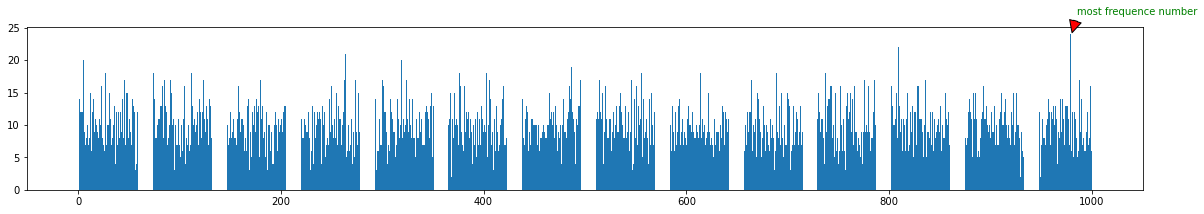

In [6]:
test_lst_3 = np.array([randint(1, M + 1) for i in range(10000)])
third_approach_result = third_approach_function(test_lst_3)
frequency_lst_3 = third_approach_function_assist(test_lst_3) 
plt.rcParams["figure.figsize"] = (20,3)
plt.bar(list(range(len(frequency_lst_3))), frequency_lst_3)
plt.annotate('most frequence number', xytext = (third_approach_result+5,frequency_lst_3[third_approach_result-1]+3) ,
             xy=(third_approach_result,frequency_lst_3[third_approach_result-1]),
             color='g',arrowprops=dict(facecolor = 'red',shrink=0.1))
print(third_approach_result)